In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


df = pd.read_csv('csv/gameandgrade.csv')
df.head()



,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83.0
2,0,1,0,0,0,0,1,3,3,80.0
3,0,1,3,5,1,1,2,2,3,45.0
4,1,1,1,1,2,1,1,3,4,85.0


In [8]:
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')
df = df.dropna()

In [9]:
X = df[['Playing Hours']]
Y = df['Grade']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)


Training Set:
     Playing Hours
60               0
623              3
615              0
687              1
760              3
..             ...
71               2
106              0
270              0
435              2
102              1

[616 rows x 1 columns]
60      95.0
623    100.0
615    100.0
687     80.0
760     57.0
       ...  
71      70.0
106     72.5
270     70.0
435    100.0
102     70.0
Name: Grade, Length: 616, dtype: float64

Testing Set:
     Playing Hours
670              3
753              1
727              1
582              0
737              0
..             ...
356              0
535              2
369              0
247              3
470              0

[154 rows x 1 columns]
670     90.0
753    100.0
727     55.5
582     75.6
737     85.0
       ...  
356     76.0
535     68.0
369     85.0
247    100.0
470    100.0
Name: Grade, Length: 154, dtype: float64


In [10]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [11]:
print(f"Intercept (b): {model.intercept_:.2f}")  
print(f"Coefficient (m): {model.coef_[0]:.2f}")  

Intercept (b): 79.99
Coefficient (m): -1.68


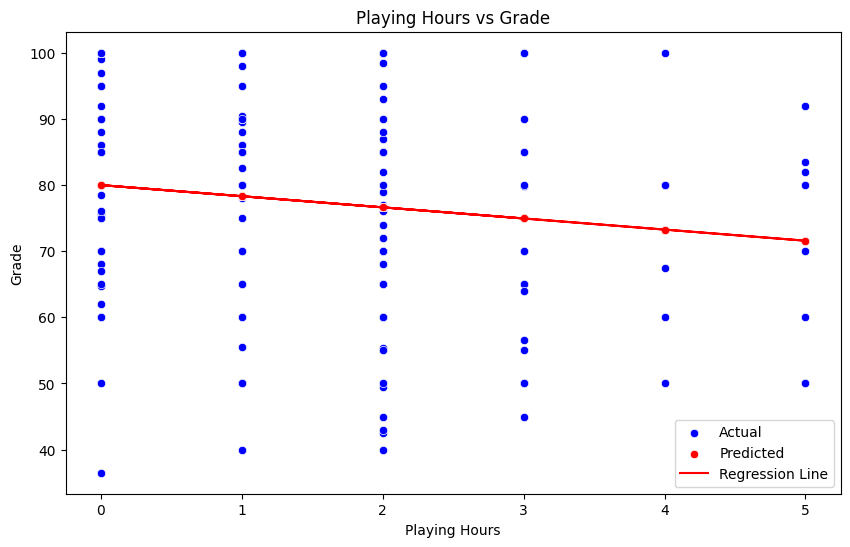

R squared: 0.05
Mean Squared Error: 294.32


In [12]:

y_pred = model.predict(X_test)

r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")
sns.scatterplot(x=X_test.values.flatten(), y=y_pred.flatten(), color="red", label="Predicted")
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Playing Hours')
plt.ylabel('Grade')
plt.title('Playing Hours vs Grade')
plt.legend()
plt.show()
print(f'R squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

